In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import boxcox

In [8]:
ASI_RMT1T2 = pd.read_csv('C:/Users/matth/Desktop/Final/The-Chill-Team/ASI_RMT1T2.csv')

In [9]:
ASI_RMT1T2.head()

,ID1,ID2,ID,FirstN,LastN,CDate,Time,Age,Sex,C1,C2,C3,C4,Ctotal,DHEA,I1,I2,P17,TIgA,GIgA
0,10,78255,10-78255,Mark,Anderson,8/2/2010,T1,55,M,19,8,12,8,47,4,3.0,23.0,28,9,5
1,10,124893,10-124893,Mark,Anderson,12/5/2010,T2,55,M,9,6,7,3,25,4,3.0,20.0,26,5,3
2,13,41439,13-41439,Diane,Asmuth,5/13/2013,T1,55,F,7,3,3,11,24,2,3.0,3.0,16,6,12
3,14,52939,14-52939,Diane,Asmuth,6/24/2014,T2,56,F,10,4,5,2,21,4,3.0,3.0,25,9,2
4,14,97689,14-97689,Deborah,Baimas,12/1/2014,T1,50,F,5,3,2,1,11,2,3.0,5.0,43,11,21


In [10]:
ASI_RMT1T2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID1     42 non-null     int64  
 1   ID2     42 non-null     int64  
 2   ID      42 non-null     object 
 3   FirstN  42 non-null     object 
 4   LastN   42 non-null     object 
 5   CDate   42 non-null     object 
 6   Time    42 non-null     object 
 7   Age     42 non-null     int64  
 8   Sex     42 non-null     object 
 9   C1      42 non-null     int64  
 10  C2      42 non-null     int64  
 11  C3      42 non-null     int64  
 12  C4      42 non-null     int64  
 13  Ctotal  42 non-null     int64  
 14  DHEA    42 non-null     int64  
 15  I1      40 non-null     float64
 16  I2      40 non-null     float64
 17  P17     42 non-null     int64  
 18  TIgA    42 non-null     int64  
 19  GIgA    42 non-null     int64  
dtypes: float64(2), int64(12), object(6)
memory usage: 5.6+ KB


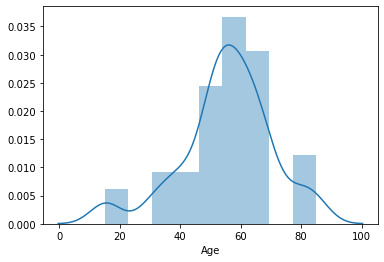

In [11]:
sns.distplot(ASI_RMT1T2['Age'])

In [12]:
ASI_RMT1T2['AgeSQ'] = ASI_RMT1T2['Age']**2

In [13]:
ASI_RMT1T2.head()

,ID1,ID2,ID,FirstN,LastN,CDate,Time,Age,Sex,C1,...,C3,C4,Ctotal,DHEA,I1,I2,P17,TIgA,GIgA,AgeSQ
0,10,78255,10-78255,Mark,Anderson,8/2/2010,T1,55,M,19,...,12,8,47,4,3.0,23.0,28,9,5,3025
1,10,124893,10-124893,Mark,Anderson,12/5/2010,T2,55,M,9,...,7,3,25,4,3.0,20.0,26,5,3,3025
2,13,41439,13-41439,Diane,Asmuth,5/13/2013,T1,55,F,7,...,3,11,24,2,3.0,3.0,16,6,12,3025
3,14,52939,14-52939,Diane,Asmuth,6/24/2014,T2,56,F,10,...,5,2,21,4,3.0,3.0,25,9,2,3136
4,14,97689,14-97689,Deborah,Baimas,12/1/2014,T1,50,F,5,...,2,1,11,2,3.0,5.0,43,11,21,2500


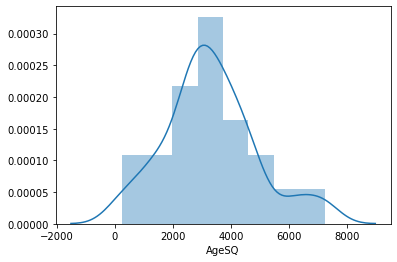

In [14]:
sns.distplot(ASI_RMT1T2['AgeSQ'])

In [15]:
ASI_RMT1T2['Time'].value_counts()

T1    21
T2    21
Name: Time, dtype: int64

In [16]:
## Double checked and made sure we have the same amount of tests.

In [17]:
ASI_RMT1T2.groupby('Time')['Age'].mean()

Time
T1    55.095238
T2    55.714286
Name: Age, dtype: float64

In [18]:
#I would have thought that they would have been the same. Now I am thinking that the T2 is older because it is later and the people could have had birthdays.

In [19]:
ASI_RMT1T2.C1.describe()

count     42.000000
mean      16.761905
std       17.238371
min        5.000000
25%        9.000000
50%       13.500000
75%       18.000000
max      110.000000
Name: C1, dtype: float64

In [20]:
ASI_RMT1T2.groupby('Time')['C1'].mean()

Time
T1    14.00000
T2    19.52381
Name: C1, dtype: float64

In [21]:
# It seems as though the T2 had a higher amount of C1 than the first testing

In [22]:
ASI_RMT1T2.C2.describe()

count     42.000000
mean      11.761905
std       17.121958
min        3.000000
25%        5.250000
50%        8.000000
75%       10.000000
max      103.000000
Name: C2, dtype: float64

In [23]:
ASI_RMT1T2.groupby('Time')['C2'].mean()

Time
T1    13.380952
T2    10.142857
Name: C2, dtype: float64

In [24]:
#Here we have the T1 is higher in C2

In [25]:
ASI_RMT1T2.C3.describe()

count    42.000000
mean      6.500000
std       4.870268
min       2.000000
25%       4.000000
50%       5.000000
75%       7.000000
max      28.000000
Name: C3, dtype: float64

In [26]:
ASI_RMT1T2.groupby('Time')['C3'].mean()

Time
T1    6.761905
T2    6.238095
Name: C3, dtype: float64

In [27]:
#C3 had about the same amount. T1 had a little higher amount

In [28]:
ASI_RMT1T2.C4.describe()

count     42.000000
mean      11.261905
std       23.187528
min        1.000000
25%        3.000000
50%        5.000000
75%        7.000000
max      110.000000
Name: C4, dtype: float64

In [29]:
ASI_RMT1T2.groupby('Time')['C4'].mean()

Time
T1     7.809524
T2    14.714286
Name: C4, dtype: float64

In [30]:
#The second testing has a higher amount

In [31]:
ASI_RMT1T2.Ctotal.describe()

count     42.000000
mean      46.285714
std       44.942937
min       11.000000
25%       24.250000
50%       32.500000
75%       45.000000
max      239.000000
Name: Ctotal, dtype: float64

In [32]:
ASI_RMT1T2.groupby('Time')['Ctotal'].mean()

Time
T1    41.952381
T2    50.619048
Name: Ctotal, dtype: float64

In [33]:
#Higher in the second testing

In [34]:
ASI_RMT1T2.DHEA.describe()

count    42.000000
mean      4.476190
std       3.915187
min       1.000000
25%       2.250000
50%       4.000000
75%       4.750000
max      25.000000
Name: DHEA, dtype: float64

In [35]:
ASI_RMT1T2.groupby('Time')['DHEA'].mean()

Time
T1    3.571429
T2    5.380952
Name: DHEA, dtype: float64

In [36]:
#DHEA is higher for the 2nd testing

In [37]:
ASI_RMT1T2.P17.describe()

count     42.000000
mean      70.142857
std      118.500092
min        1.000000
25%       20.250000
50%       28.500000
75%       42.750000
max      500.000000
Name: P17, dtype: float64

In [38]:
ASI_RMT1T2.groupby('Time')['P17'].mean()

Time
T1    63.000000
T2    77.285714
Name: P17, dtype: float64

In [39]:
#P17 higher for the second testing

In [40]:
ASI_RMT1T2.TIgA.describe()

count    42.000000
mean      8.904762
std       4.041308
min       5.000000
25%       5.250000
50%       8.500000
75%      10.750000
max      22.000000
Name: TIgA, dtype: float64

In [41]:
ASI_RMT1T2.groupby('Time')['TIgA'].mean()

Time
T1    7.904762
T2    9.904762
Name: TIgA, dtype: float64

In [42]:
#The TIGA is higher for the second testing

In [43]:
ASI_RMT1T2.GIgA.describe()

count    42.000000
mean      9.142857
std       9.097229
min       1.000000
25%       3.250000
50%       6.500000
75%      11.000000
max      45.000000
Name: GIgA, dtype: float64

In [44]:
ASI_RMT1T2.groupby('Time')['GIgA'].mean()

Time
T1    9.333333
T2    8.952381
Name: GIgA, dtype: float64

In [45]:
#GIGA higher for the first testing

In [46]:
ASI_RMT1T2[['C1', 'C2', 'C3', 'C4', 'Ctotal', 'DHEA', 'P17', 'TIgA', 'GIgA', 'Time']].corr()

,C1,C2,C3,C4,Ctotal,DHEA,P17,TIgA,GIgA
C1,1.000000,0.049467,0.133346,0.621517,0.737518,-0.008398,0.433806,0.106449,-0.049391
C2,0.049467,1.000000,0.298047,0.320232,0.597461,-0.035015,0.118786,-0.192440,-0.143679
C3,0.133346,0.298047,1.000000,0.069653,0.308995,0.260940,0.453761,0.022306,-0.227905
C4,0.621517,0.320232,0.069653,1.000000,0.883869,-0.057289,0.303865,0.012766,-0.096613
Ctotal,0.737518,0.597461,0.308995,0.883869,1.000000,-0.017841,0.417591,-0.023481,-0.148225
DHEA,-0.008398,-0.035015,0.260940,-0.057289,-0.017841,1.000000,-0.004303,0.496214,-0.125903
P17,0.433806,0.118786,0.453761,0.303865,0.417591,-0.004303,1.000000,-0.005522,-0.194617
TIgA,0.106449,-0.192440,0.022306,0.012766,-0.023481,0.496214,-0.005522,1.000000,0.304886
GIgA,-0.049391,-0.143679,-0.227905,-0.096613,-0.148225,-0.125903,-0.194617,0.304886,1.000000


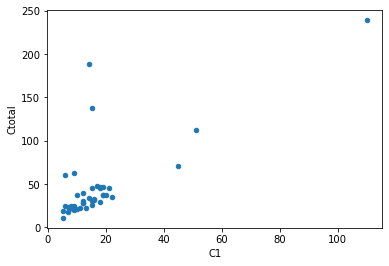

In [47]:
PlotC1Ctotal = ASI_RMT1T2.plot.scatter( x = 'C1', y = 'Ctotal')

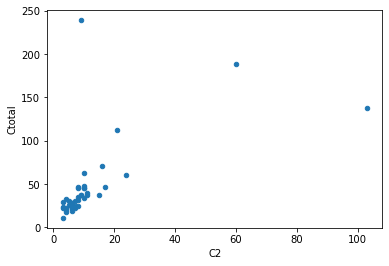

In [48]:
PlotC2Ctotal = ASI_RMT1T2.plot.scatter( x = 'C2', y = 'Ctotal')

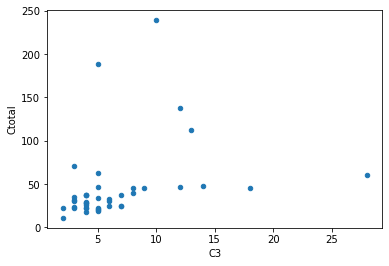

In [49]:
PlotC3Ctotal = ASI_RMT1T2.plot.scatter( x = 'C3', y = 'Ctotal')

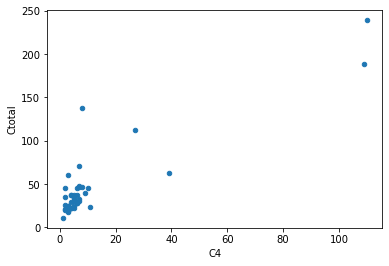

In [50]:
PlotC4Ctotal = ASI_RMT1T2.plot.scatter( x = 'C4', y = 'Ctotal')

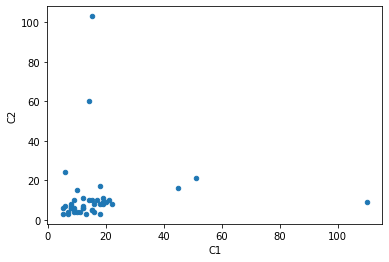

In [51]:
PlotC1C2 = ASI_RMT1T2.plot.scatter( x = 'C1', y = 'C2')

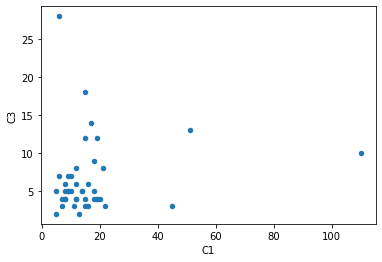

In [52]:
PlotC1C3 = ASI_RMT1T2.plot.scatter( x = 'C1', y = 'C3')

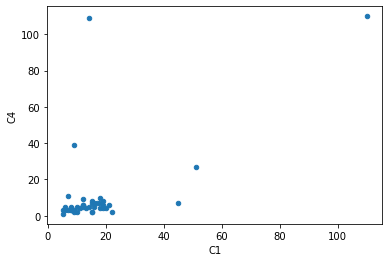

In [53]:
PlotC1C4 = ASI_RMT1T2.plot.scatter( x = 'C1', y = 'C4')

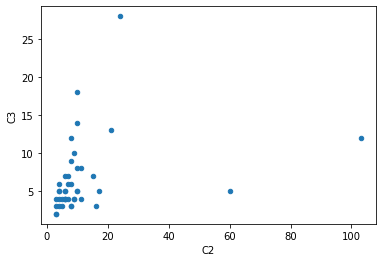

In [54]:
PlotC2C3 = ASI_RMT1T2.plot.scatter( x = 'C2', y = 'C3')

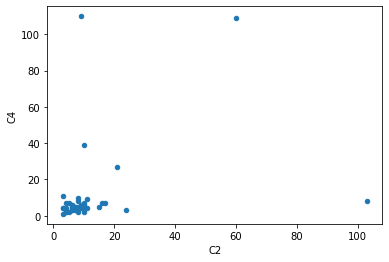

In [55]:
PlotC2C4 = ASI_RMT1T2.plot.scatter( x = 'C2', y = 'C4')

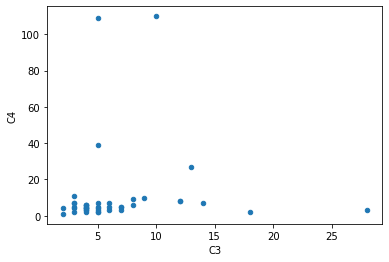

In [56]:
PlotC3C4 = ASI_RMT1T2.plot.scatter( x = 'C3', y = 'C4')

Text(0, 0.5, 'Frequency')

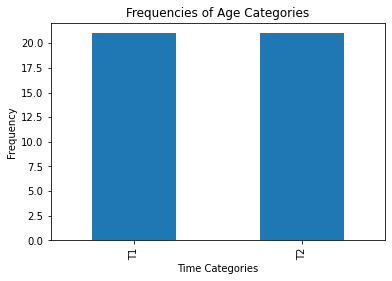

In [57]:
BarC1RV = ASI_RMT1T2['Time'].value_counts().plot(kind = 'bar')
BarC1RV.set_title("Frequencies of Age Categories")
BarC1RV.set_xlabel("Time Categories")
BarC1RV.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

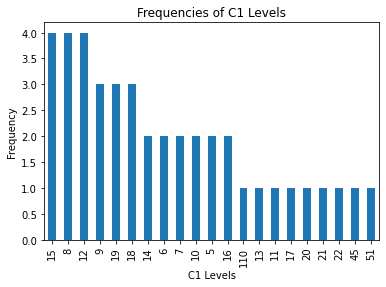

In [58]:
BarC1RV = ASI_RMT1T2['C1'].value_counts().plot(kind = 'bar')
BarC1RV.set_title("Frequencies of C1 Levels")
BarC1RV.set_xlabel("C1 Levels")
BarC1RV.set_ylabel("Frequency")

In [59]:
def c1 (series):
    if series < 13:
        return "Depressed"
    if series >= 13 and series <=24:
        return "Normal"
    if series >24:
        return "Elevated"
ASI_RMT1T2['C1RV'] = ASI_RMT1T2['C1'].apply(c1)

In [60]:
def c2 (series):
    if series < 5:
        return "Depressed"
    if series >= 5 and series <=10:
        return "Normal"
    if series >10:
        return "Elevated"
ASI_RMT1T2['C2RV'] = ASI_RMT1T2['C2'].apply(c2)

In [61]:
def c3 (series):
    if series < 3:
        return "Depressed"
    if series >= 3 and series <=8:
        return "Normal"
    if series >8:
        return "Elevated"
ASI_RMT1T2['C3RV'] = ASI_RMT1T2['C3'].apply(c3)

In [62]:
def c4 (series):
    if series < 1:
        return "Depressed"
    if series >= 1 and series <=4:
        return "Normal"
    if series >4:
        return "Elevated"
ASI_RMT1T2['C4RV'] = ASI_RMT1T2['C4'].apply(c4)

In [63]:
def tc1 (series):
    if series < 22:
        return "Depressed"
    if series >= 22 and series <= 46:
        return "Normal"
    if series > 46:
        return "Elevated"
ASI_RMT1T2['CtotalRV'] = ASI_RMT1T2['Ctotal'].apply(tc1)

In [64]:
def d (series):
    if series < 3:
        return "Depressed"
    if series >= 3 and series <=10:
        return "Normal"
    if series >10:
        return "Elevated"
ASI_RMT1T2['DHEARV'] = ASI_RMT1T2['DHEA'].apply(d)

In [65]:
def p (series):
    if series < 22:
        return "Depressed"
    if series >= 22 and series <= 100:
        return "Optimal"
    if series >= 101 and series <= 130:
        return "Borderline Elevated"
    if series > 130:
        return "Elevated"
ASI_RMT1T2['P17RV'] = ASI_RMT1T2['P17'].apply(p)

In [66]:
def ti (series):
    if series < 5:
        return "Depressed"
    if series >= 5 and series <= 9:
        return "Borderline Low"
    if series >= 10 and series <= 20:
        return "Normal"
    if series >= 21 and series <= 25:
        return "Borderline High"
    if series > 25:
        return "Elevated"
ASI_RMT1T2['TIgARV'] = ASI_RMT1T2['TIgA'].apply(ti)

In [67]:
def gi (series):
    if series < 13:
        return "Negative"
    if series >= 13and series <= 15:
        return "Borderline"
    if series >= 15:
        return "Positive"
ASI_RMT1T2['GIgARV'] = ASI_RMT1T2['GIgA'].apply(gi)


Text(0, 0.5, 'Frequency')

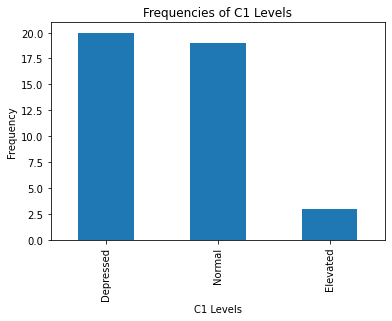

In [68]:
BarC1RV = ASI_RMT1T2['C1RV'].value_counts().plot(kind = 'bar')
BarC1RV.set_title("Frequencies of C1 Levels")
BarC1RV.set_xlabel("C1 Levels")
BarC1RV.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

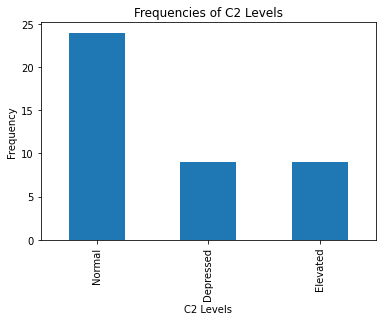

In [69]:
BarC2RV = ASI_RMT1T2['C2RV'].value_counts().plot(kind = 'bar')
BarC2RV.set_title("Frequencies of C2 Levels")
BarC2RV.set_xlabel("C2 Levels")
BarC2RV.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

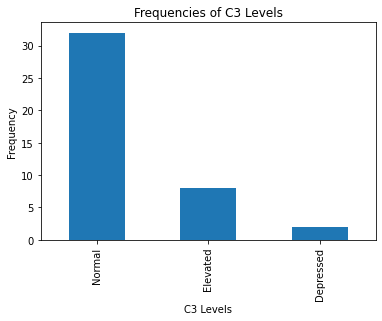

In [70]:
BarC3RV = ASI_RMT1T2['C3RV'].value_counts().plot(kind = 'bar')
BarC3RV.set_title("Frequencies of C3 Levels")
BarC3RV.set_xlabel("C3 Levels")
BarC3RV.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

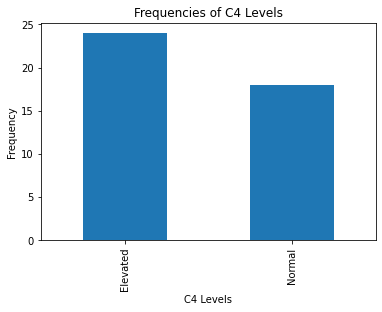

In [71]:
BarC4RV = ASI_RMT1T2['C4RV'].value_counts().plot(kind = 'bar')
BarC4RV.set_title("Frequencies of C4 Levels")
BarC4RV.set_xlabel("C4 Levels")
BarC4RV.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

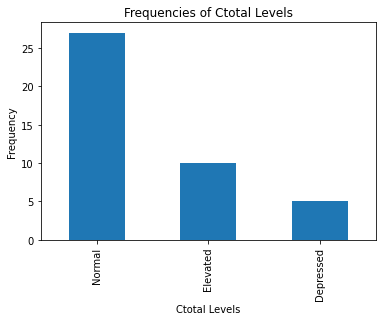

In [72]:
BarCtotalRV = ASI_RMT1T2['CtotalRV'].value_counts().plot(kind = 'bar')
BarCtotalRV.set_title("Frequencies of Ctotal Levels")
BarCtotalRV.set_xlabel("Ctotal Levels")
BarCtotalRV.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

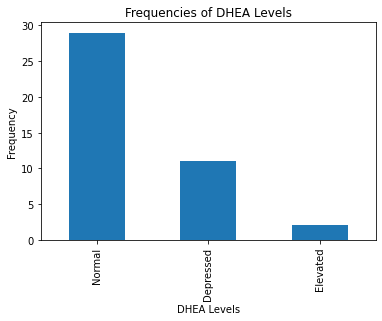

In [73]:
BarDHEARV = ASI_RMT1T2['DHEARV'].value_counts().plot(kind = 'bar')
BarDHEARV.set_title("Frequencies of DHEA Levels")
BarDHEARV.set_xlabel("DHEA Levels")
BarDHEARV.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

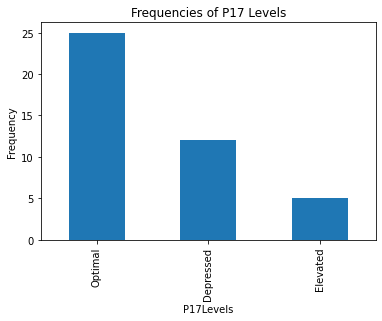

In [74]:
BarP17RV = ASI_RMT1T2['P17RV'].value_counts().plot(kind = 'bar')
BarP17RV.set_title("Frequencies of P17 Levels")
BarP17RV.set_xlabel("P17Levels")
BarP17RV.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

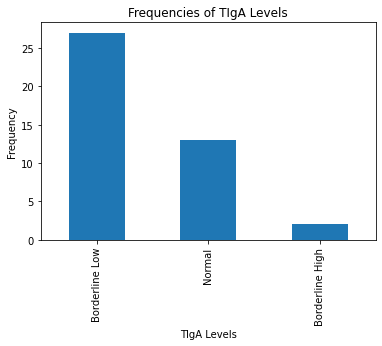

In [75]:
BarTIgARV = ASI_RMT1T2['TIgARV'].value_counts().plot(kind = 'bar')
BarTIgARV.set_title("Frequencies of TIgA Levels")
BarTIgARV.set_xlabel("TIgA Levels")
BarTIgARV.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

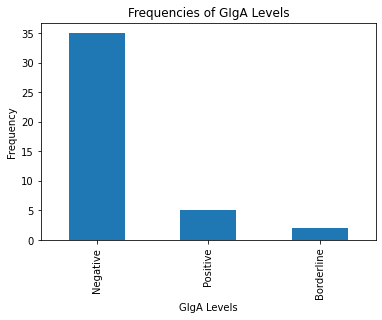

In [78]:
BarGIgARV = ASI_RMT1T2['GIgARV'].value_counts().plot(kind = 'bar')
BarGIgARV.set_title("Frequencies of GIgA Levels")
BarGIgARV.set_xlabel("GIgA Levels")
BarGIgARV.set_ylabel("Frequency")

In [81]:
d.to_csv(r'C:\Users\matth\Desktop\Final\The-Chill-Team\ASI_RMT1T2RV.csv')

NameError: name 'df' is not defined